In [76]:
import requests
import bs4
import pandas as pd
import re
import numpy as np

In [77]:
df=pd.read_csv('./output.csv')

In [78]:
df.head()

,Room,Area,Floor,Prices,Address,Longitude,Latitude
0,3 otaqlı,90 m²,11,124 500,Xalqlar Dostluğu m. Baku,49.953190,40.396860
1,6 otaqlı,213.7 m²,13,360 000,28 May m. Baku,49.943378,40.471269
2,2 otaqlı,48.9 m²,9,81 975,İnşaatçılar m. Baku,49.821652,40.380392
3,2 otaqlı,79.5 m²,8,107 325,7-ci mikrorayon q. Baku,49.872220,40.410660
4,3 otaqlı,117.8 m²,1,200 311,Nəriman Nərimanov m. Baku,49.950807,40.473420


In [79]:
def rooms(x):
    return re.sub("\D","",x)

In [80]:
def prices(x):
    return re.sub("\D","",x)

In [81]:
def areas(x):
    return re.sub(" m²","",x)

In [82]:
df['Room']=df['Room'].apply(rooms)

In [83]:
df['Area']=df['Area'].apply(areas)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Room       2452 non-null   object 
 1   Area       2452 non-null   object 
 2   Floor      2452 non-null   int64  
 3   Prices     2452 non-null   object 
 4   Address    2452 non-null   object 
 5   Longitude  2452 non-null   float64
 6   Latitude   2452 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 134.2+ KB


In [85]:
df.head()

,Room,Area,Floor,Prices,Address,Longitude,Latitude
0,3,90,11,124 500,Xalqlar Dostluğu m. Baku,49.953190,40.396860
1,6,213.7,13,360 000,28 May m. Baku,49.943378,40.471269
2,2,48.9,9,81 975,İnşaatçılar m. Baku,49.821652,40.380392
3,2,79.5,8,107 325,7-ci mikrorayon q. Baku,49.872220,40.410660
4,3,117.8,1,200 311,Nəriman Nərimanov m. Baku,49.950807,40.473420


In [86]:
df['Area']=df['Area'].apply(lambda x: float(x))


In [87]:
df.head()

,Room,Area,Floor,Prices,Address,Longitude,Latitude
0,3,90.0,11,124 500,Xalqlar Dostluğu m. Baku,49.953190,40.396860
1,6,213.7,13,360 000,28 May m. Baku,49.943378,40.471269
2,2,48.9,9,81 975,İnşaatçılar m. Baku,49.821652,40.380392
3,2,79.5,8,107 325,7-ci mikrorayon q. Baku,49.872220,40.410660
4,3,117.8,1,200 311,Nəriman Nərimanov m. Baku,49.950807,40.473420


In [88]:
df['Floor']=df['Floor'].replace({np.nan:df['Floor'].median()})

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Room       2452 non-null   object 
 1   Area       2452 non-null   float64
 2   Floor      2452 non-null   int64  
 3   Prices     2452 non-null   object 
 4   Address    2452 non-null   object 
 5   Longitude  2452 non-null   float64
 6   Latitude   2452 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 134.2+ KB


In [90]:
df['Floor']=df['Floor'].apply(lambda x: float(x))

In [91]:
df['Room']=df['Room'].apply(lambda x: float(x))

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Room       2452 non-null   float64
 1   Area       2452 non-null   float64
 2   Floor      2452 non-null   float64
 3   Prices     2452 non-null   object 
 4   Address    2452 non-null   object 
 5   Longitude  2452 non-null   float64
 6   Latitude   2452 non-null   float64
dtypes: float64(5), object(2)
memory usage: 134.2+ KB


In [93]:
df['Prices']=df['Prices'].apply(prices)

In [94]:
df['Prices']=df['Prices'].apply(lambda x: float(x))

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Room       2452 non-null   float64
 1   Area       2452 non-null   float64
 2   Floor      2452 non-null   float64
 3   Prices     2452 non-null   float64
 4   Address    2452 non-null   object 
 5   Longitude  2452 non-null   float64
 6   Latitude   2452 non-null   float64
dtypes: float64(6), object(1)
memory usage: 134.2+ KB


In [96]:
df.drop('Address',axis=1,inplace=True)

In [97]:
df

,Room,Area,Floor,Prices,Longitude,Latitude
0,3.0,90.0,11.0,124500.0,49.953190,40.396860
1,6.0,213.7,13.0,360000.0,49.943378,40.471269
2,2.0,48.9,9.0,81975.0,49.821652,40.380392
3,2.0,79.5,8.0,107325.0,49.872220,40.410660
4,3.0,117.8,1.0,200311.0,49.950807,40.473420
...,...,...,...,...,...,...
2447,2.0,87.3,3.0,186500.0,49.928130,40.403310
2448,4.0,168.0,12.0,370000.0,49.832510,40.394190
2449,2.0,50.4,3.0,78000.0,49.978835,40.384650
2450,2.0,72.5,8.0,157000.0,49.801871,40.410241


In [98]:
from matplotlib import pyplot as plt

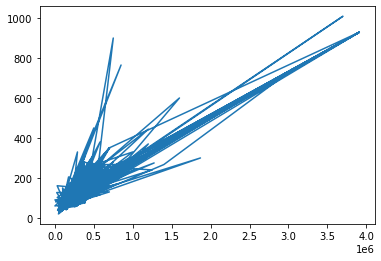

In [99]:
plt.plot(df.Prices,df.Area)

In [100]:
X = df.loc[:, df.columns != 'Prices']
y = df.loc[:, 'Prices']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
X

,Room,Area,Floor,Longitude,Latitude
0,3.0,90.0,11.0,49.953190,40.396860
1,6.0,213.7,13.0,49.943378,40.471269
2,2.0,48.9,9.0,49.821652,40.380392
3,2.0,79.5,8.0,49.872220,40.410660
4,3.0,117.8,1.0,49.950807,40.473420
...,...,...,...,...,...
2447,2.0,87.3,3.0,49.928130,40.403310
2448,4.0,168.0,12.0,49.832510,40.394190
2449,2.0,50.4,3.0,49.978835,40.384650
2450,2.0,72.5,8.0,49.801871,40.410241


In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [104]:
y_pred = regressor.predict(X_test)


In [105]:
from sklearn.metrics import r2_score

In [106]:
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.8486348034624774


In [37]:
from catboost import CatBoostRegressor

In [38]:
model = CatBoostRegressor(learning_rate=0.1, depth=4, iterations=500)


In [39]:
model.fit(X_train,y_train)

0:	learn: 260698.6501133	total: 57.6ms	remaining: 28.7s
1:	learn: 245752.0251488	total: 59.3ms	remaining: 14.8s
2:	learn: 230450.4964939	total: 60.5ms	remaining: 10s
3:	learn: 217739.0595972	total: 61.4ms	remaining: 7.62s
4:	learn: 205007.9917424	total: 62.3ms	remaining: 6.17s
5:	learn: 195699.6716198	total: 63.1ms	remaining: 5.2s
6:	learn: 186107.3832980	total: 64.1ms	remaining: 4.51s
7:	learn: 177502.5716167	total: 65.1ms	remaining: 4.01s
8:	learn: 168405.3459070	total: 66ms	remaining: 3.6s
9:	learn: 160397.6617617	total: 66.9ms	remaining: 3.28s
10:	learn: 152863.9724510	total: 67.6ms	remaining: 3s
11:	learn: 147524.2411257	total: 68.5ms	remaining: 2.78s
12:	learn: 141341.5200908	total: 69.3ms	remaining: 2.6s
13:	learn: 134866.9243479	total: 70.1ms	remaining: 2.44s
14:	learn: 129768.6354307	total: 70.9ms	remaining: 2.29s
15:	learn: 125252.0709734	total: 71.5ms	remaining: 2.16s
16:	learn: 121510.7288979	total: 72.1ms	remaining: 2.05s
17:	learn: 117994.1114779	total: 72.6ms	remaining: 

343:	learn: 48826.9310606	total: 226ms	remaining: 102ms
344:	learn: 48806.7850565	total: 226ms	remaining: 102ms
345:	learn: 48755.8477103	total: 227ms	remaining: 101ms
346:	learn: 48736.4420780	total: 227ms	remaining: 100ms
347:	learn: 48687.1838689	total: 228ms	remaining: 99.4ms
348:	learn: 48661.2605036	total: 228ms	remaining: 98.7ms
349:	learn: 48616.6289168	total: 229ms	remaining: 98ms
350:	learn: 48556.3444348	total: 229ms	remaining: 97.3ms
351:	learn: 48497.9747931	total: 230ms	remaining: 96.6ms
352:	learn: 48440.2237079	total: 230ms	remaining: 95.9ms
353:	learn: 48375.1543368	total: 231ms	remaining: 95.2ms
354:	learn: 48338.1657727	total: 231ms	remaining: 94.5ms
355:	learn: 48296.9268914	total: 232ms	remaining: 93.7ms
356:	learn: 48266.3114397	total: 232ms	remaining: 93ms
357:	learn: 48249.6205397	total: 233ms	remaining: 92.3ms
358:	learn: 48215.7011386	total: 233ms	remaining: 91.6ms
359:	learn: 48183.7667511	total: 234ms	remaining: 90.8ms
360:	learn: 48152.1423420	total: 234ms	

In [40]:
y_pred = model.predict(X_test)

In [42]:
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.9363835350262043


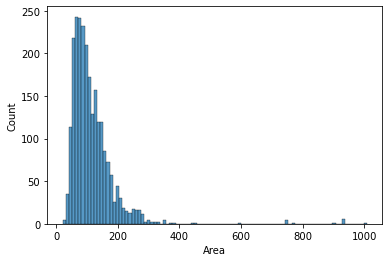

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(x='Area', data=df)

# Show the plot
plt.show()

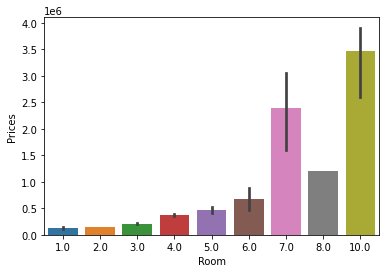

In [71]:
sns.barplot(x="Room", y="Prices", data=df)

plt.show()

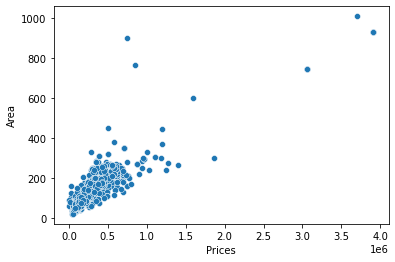

In [75]:
sns.scatterplot(x="Prices", y="Area", data=df)

plt.show()

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Room       2452 non-null   float64
 1   Area       2452 non-null   float64
 2   Floor      2452 non-null   float64
 3   Prices     2452 non-null   float64
 4   Longitude  2452 non-null   float64
 5   Latitude   2452 non-null   float64
dtypes: float64(6)
memory usage: 115.1 KB


In [67]:
df

,Room,Area,Floor,Prices,Longitude,Latitude
0,3.0,90.0,11.0,124500.0,49.953190,40.396860
1,6.0,213.7,13.0,360000.0,49.943378,40.471269
2,2.0,48.9,9.0,81975.0,49.821652,40.380392
3,2.0,79.5,8.0,107325.0,49.872220,40.410660
4,3.0,117.8,1.0,200311.0,49.950807,40.473420
...,...,...,...,...,...,...
2447,2.0,87.3,3.0,186500.0,49.928130,40.403310
2448,4.0,168.0,12.0,370000.0,49.832510,40.394190
2449,2.0,50.4,3.0,78000.0,49.978835,40.384650
2450,2.0,72.5,8.0,157000.0,49.801871,40.410241
